# Main Library

In [115]:
# Reading Data And Visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [3]:
# Reading Data

data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\Red_Wine_Quality\winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Data Information 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Data Describe

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data not have null value 

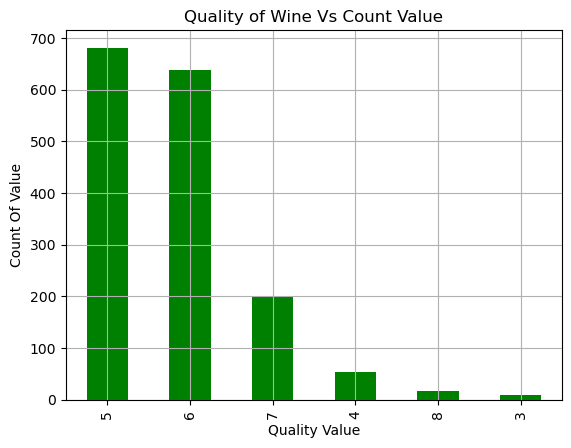

In [22]:
data["quality"].value_counts().plot(kind="bar", color="green")
plt.title("Quality of Wine Vs Count Value")
plt.xlabel("Quality Value")
plt.ylabel("Count Of Value")

plt.grid()
plt.show()

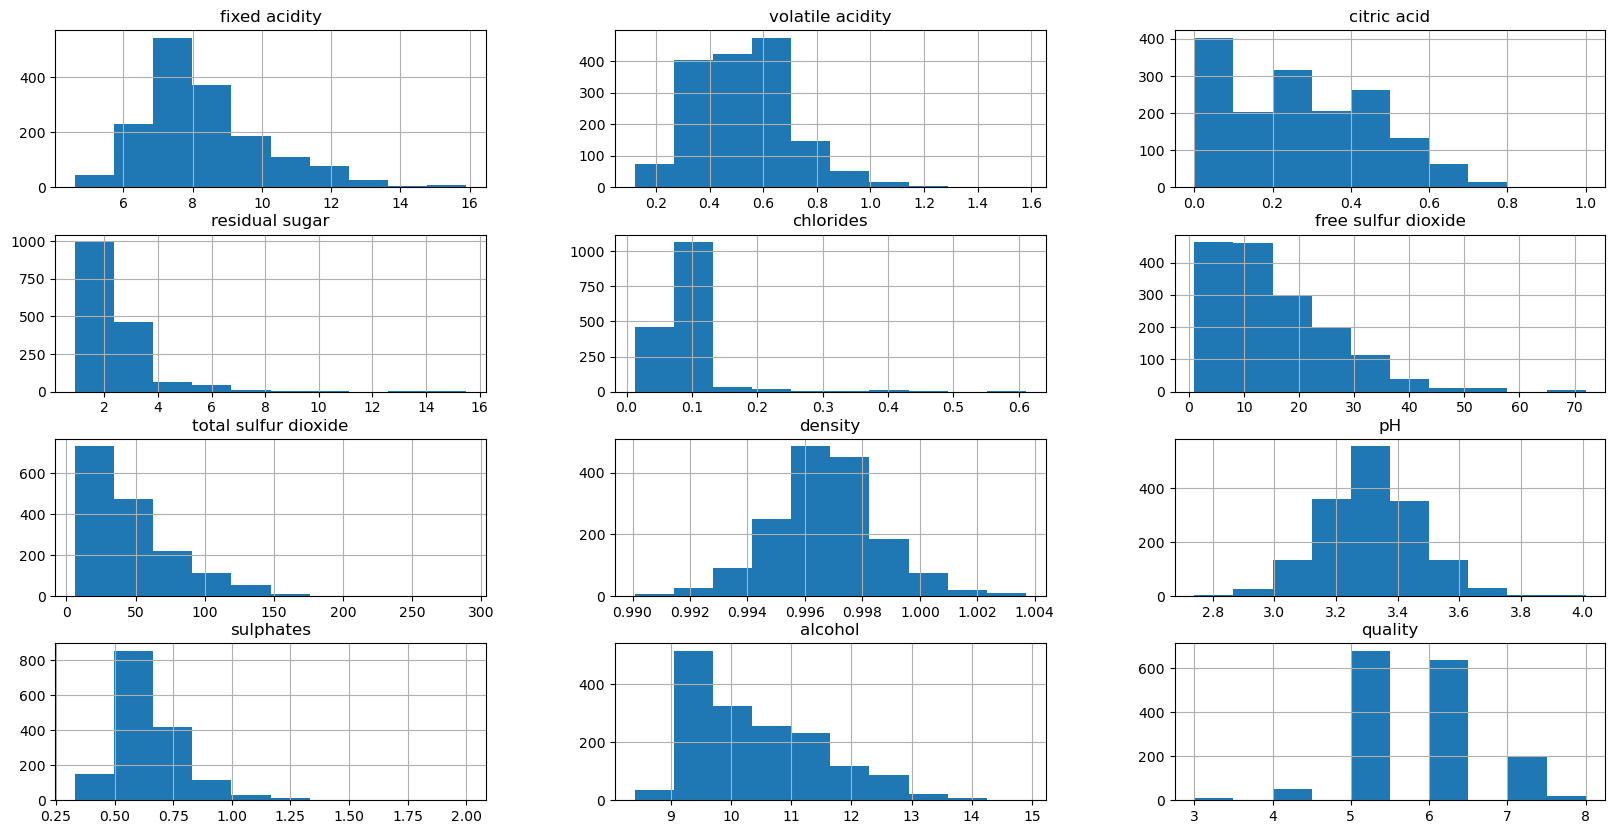

In [31]:
data.hist(figsize=(20,10));

In [47]:
data[data["chlorides"] > 0.5]["chlorides"].index

Int64Index([151, 258], dtype='int64')

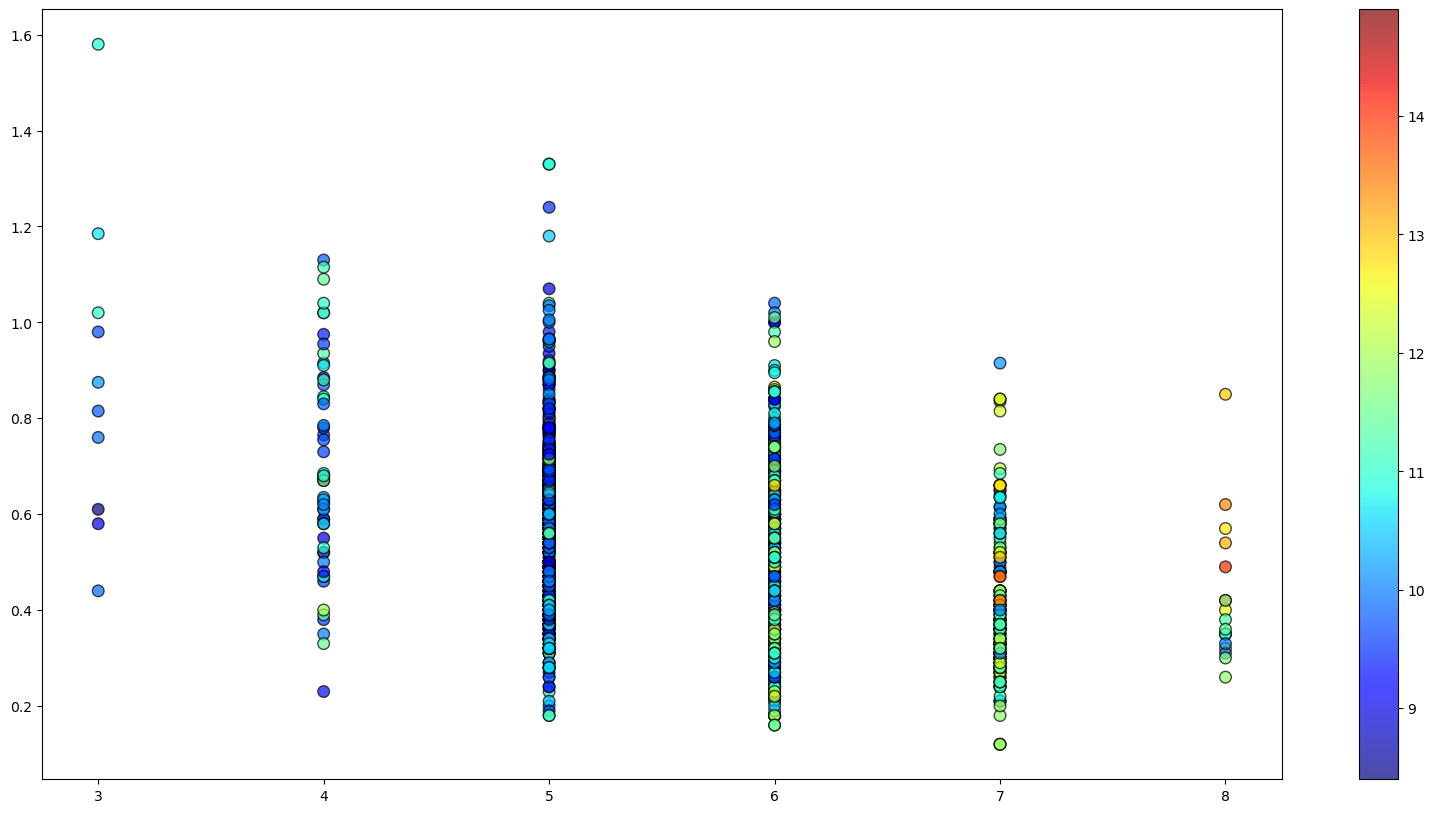

In [74]:
plt.figure(figsize=(20, 10))
x = plt.scatter(x =data["quality"], y=data["volatile acidity"], c=data["alcohol"], 
                cmap=plt.get_cmap("jet"), 
                alpha=0.7, 
                edgecolors="black", 
                linewidths=1,
                s=70)

plt.colorbar(x)
plt.show()

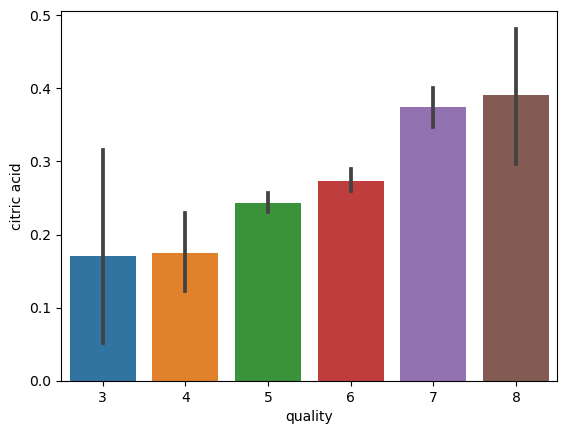

In [79]:
sns.barplot(x =data["quality"], y=data["citric acid"]);


# Relation between citric acid Vs Quality is Upper

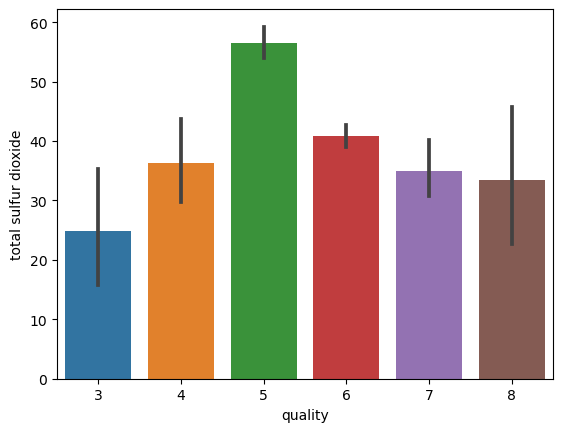

In [78]:
sns.barplot(x =data["quality"], y=data["total sulfur dioxide"]);

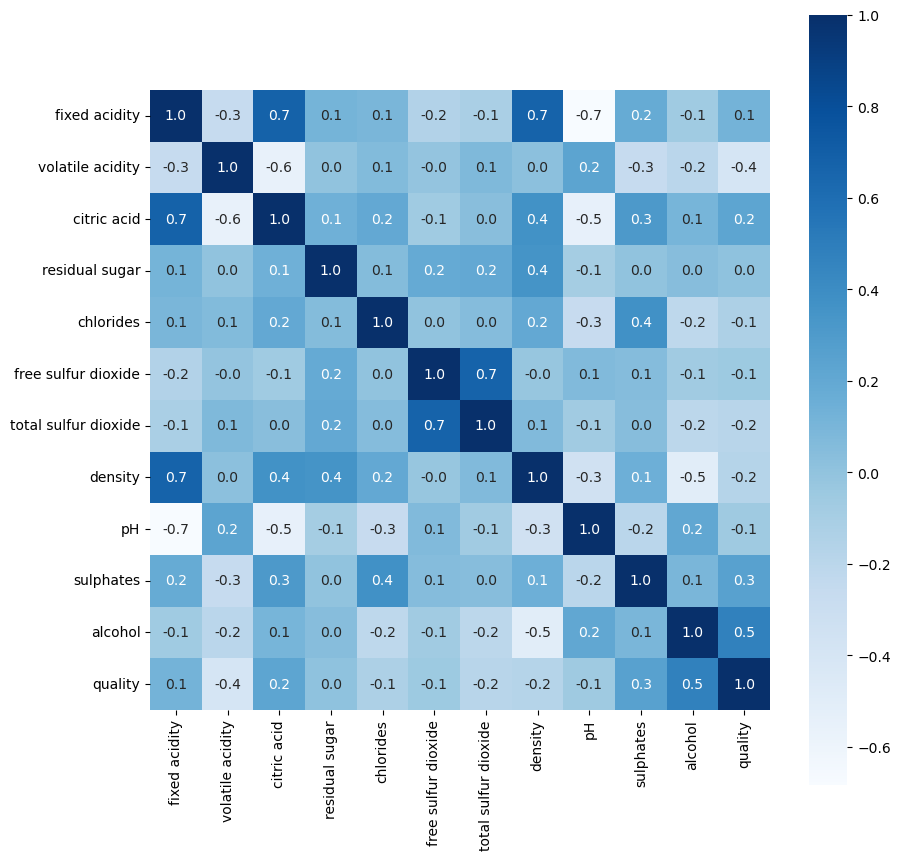

In [85]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, annot=True,  fmt=".1f",cmap="Blues", square=True);

In [407]:
X = data.drop(columns="quality", axis=1)
Y = data["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=2, stratify=Y)

# Model_1 ==> Logistic_Regression

In [408]:
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(x_train, y_train)

print(f"The prediction Value Training Data is  ==> {model_1.score(x_train, y_train)}")
print(f"The prediction Value Testing Data is  ==> {model_1.score(x_test, y_test)}")

The prediction Value Training Data is  ==> 0.8756841282251759
The prediction Value Testing Data is  ==> 0.89375


In [409]:
Trainning_Prediction = model_1.predict(x_train)
Trainning_accuracy = accuracy_score(Trainning_Prediction, y_train)

Testing_Prediction = model_1.predict(x_test)
Testing_accuracy = accuracy_score(Testing_Prediction, y_test)
print(f"The Accuracy Score os Trainig Data is ==> {Trainning_accuracy}")
print("-" *20)
print(f"The Accuracy Score os Testing Data is ==> {Testing_accuracy}")

The Accuracy Score os Trainig Data is ==> 0.8756841282251759
--------------------
The Accuracy Score os Testing Data is ==> 0.89375


## This Algorithm is Good But not the Best
           This Make me THis Data Balaned Fiting

# model_2 ==> Random_Forest

In [410]:
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)

print(f"The prediction Value Training Data is  ==> {model_2.score(x_train, y_train)}")
print(f"The prediction Value Testing Data is  ==> {model_2.score(x_test, y_test)}")

The prediction Value Training Data is  ==> 1.0
The prediction Value Testing Data is  ==> 0.93125


In [411]:
Trainning_Prediction = model_2.predict(x_train)
Trainning_accuracy = accuracy_score(Trainning_Prediction, y_train)

Testing_Prediction = model_2.predict(x_test)
Testing_accuracy = accuracy_score(Testing_Prediction, y_test)
print(f"The Accuracy Score os Trainig Data is ==> {Trainning_accuracy}")
print("-" *20)
print(f"The Accuracy Score os Testing Data is ==> {Testing_accuracy}")

The Accuracy Score os Trainig Data is ==> 1.0
--------------------
The Accuracy Score os Testing Data is ==> 0.93125


In [412]:
param = {"n_estimators":np.arange(20, 26, 1),
         "max_depth": np.arange(9, 11, 1),
         "min_samples_split": [2, 3 , 4]}

new_model = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param,
                         cv=20,
                         n_jobs=-1,
                         scoring="accuracy",
                         refit=0.4)
new_model.fit(x_train, y_train)

new_model.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=24)

In [413]:
new_model.best_estimator_, new_model.best_score_

(RandomForestClassifier(max_depth=10, n_estimators=24), 0.9014756944444444)

# Buliding System Prediction

In [415]:
Data_Prediction = np.asarray(list(map(float, input().split(",")))).reshape(1, -1)
Predict = model_2.predict(Data_Prediction)

# print(Predict)
print("-" * 30)
if Predict[0] == 1:
    print("Quality Wine is Good           |")
else:
    print("Quality Wine is Bad")
print("-" * 30)

ValueError: could not convert string to float: ''